In [1]:
import torch
import torch.nn as nn

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


/home/dev_ashish/anaconda3/lib/python3.9/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


# 1. Get Custom Data

Our dataset is a subset of the Food101 dataset.

Food101 starts with 101 different classes of food and 1000 images per class (750 training, 250 testing).

Our Custom dataset starts with 3 classes of food and only 10% of the images.

Why do this?

When starting out ML projects, it's important to try things on a small scale and then increase the scale when necassary.

The whole point is to speed up how fast you can experiment.

In [6]:

import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("Datasets/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping download")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents = True, exist_ok = True)
    
    
    
'''    
# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    # must have raw dataset link instead of blob
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)
    
    
# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data...")
    zip_ref.extractall(image_path)
    
'''

Datasets/pizza_steak_sushi directory already exists... skipping download


'    \n# Download pizza, steak and sushi data\nwith open(data_path / "pizza_steak_sushi.zip", "wb") as f:\n    # must have raw dataset link instead of blob\n    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")\n    print("Downloading pizza, steak, sushi data...")\n    f.write(request.content)\n    \n    \n# Unzip pizza, steak, sushi data\nwith zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:\n    print("Unzipping pizza, steak and sushi data...")\n    zip_ref.extractall(image_path)\n    \n'

# 2. Becoming One With The Data (Data Preparation and Data Exploration)

In [4]:
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [7]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'Datasets/pizza_steak_sushi'.
There are 3 directories and 0 images in 'Datasets/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'Datasets/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'Datasets/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'Datasets/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'Datasets/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'Datasets/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'Datasets/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'Datasets/pizza_steak_sushi/train/sushi'.


In [8]:
# Setup train and testing path
train_dir = image_path / "train"
test_dir = image_path/ "test"

train_dir, test_dir

(PosixPath('Datasets/pizza_steak_sushi/train'),
 PosixPath('Datasets/pizza_steak_sushi/test'))

## 2.1 Visualizing an Image

Random image path Datasets/pizza_steak_sushi/test/sushi/2394442.jpg
Image Class: sushi
Image Height: 408
Image Width: 512


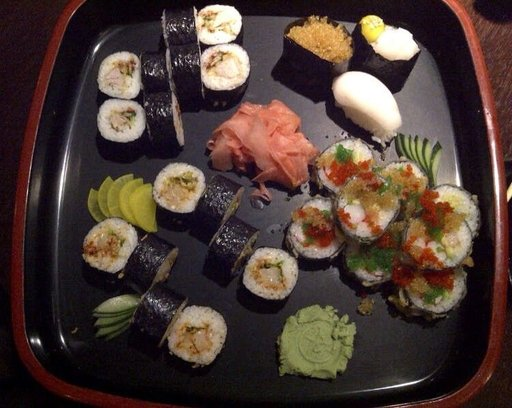

In [27]:
import random
from PIL import Image

# set seed
random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
# print(image_path_list)

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
# print(random_image_path)

# 3. Get image class from path name
image_class = random_image_path.parent.stem
# print(image_class)

# 4. Open Image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")

img

# 3. Transforming Data

Before we can use our image data with PyTorch:

1. Turn your data into tensors (in our case, numerical representation of our images).
2. Turn it into a `torch.utils.data.dataset` and subsequently a `torch.utils.data.DataLoader`, we'll call these `Dataset` and `DataLoader`.

In [62]:
import torch
from torchvision import datasets, transforms

# 3.1 Write a transform for image

In [42]:
data_transform = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.RandomVerticalFlip(p = 0.5),
    transforms.ToTensor()
    ])

In [43]:
print(data_transform(img).shape)
print(data_transform(img).dtype)
data_transform(img)

torch.Size([3, 64, 64])
torch.float32


tensor([[[0.0314, 0.0314, 0.0275,  ..., 0.1137, 0.1294, 0.1255],
         [0.0275, 0.0275, 0.0275,  ..., 0.1255, 0.1373, 0.1333],
         [0.0157, 0.0196, 0.0157,  ..., 0.1294, 0.1373, 0.1412],
         ...,
         [0.1294, 0.1412, 0.1333,  ..., 0.1059, 0.0980, 0.1137],
         [0.1255, 0.1373, 0.1412,  ..., 0.0902, 0.0902, 0.0902],
         [0.1294, 0.1373, 0.1412,  ..., 0.0863, 0.0824, 0.0824]],

        [[0.0118, 0.0157, 0.0196,  ..., 0.0667, 0.0667, 0.0667],
         [0.0118, 0.0118, 0.0118,  ..., 0.0706, 0.0706, 0.0667],
         [0.0039, 0.0078, 0.0078,  ..., 0.0667, 0.0667, 0.0667],
         ...,
         [0.0510, 0.0627, 0.0627,  ..., 0.0471, 0.0471, 0.0392],
         [0.0588, 0.0549, 0.0667,  ..., 0.0392, 0.0431, 0.0353],
         [0.0588, 0.0588, 0.0667,  ..., 0.0392, 0.0431, 0.0431]],

        [[0.0314, 0.0157, 0.0235,  ..., 0.0510, 0.0471, 0.0549],
         [0.0275, 0.0196, 0.0157,  ..., 0.0392, 0.0510, 0.0549],
         [0.0196, 0.0118, 0.0157,  ..., 0.0471, 0.0510, 0.

## 3.2 Plots the original vs the transformed version.

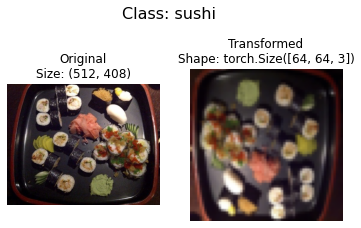

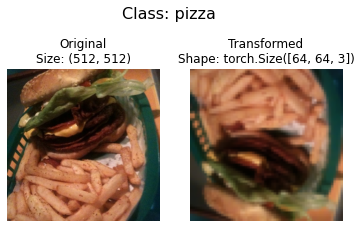

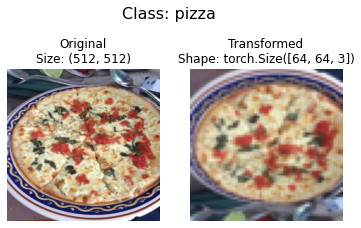

In [44]:
import matplotlib.pyplot as plt

def plot_transformed_images(image_paths, transform, n = 3, seed = 42):
    """
    Selects random images from a path of images and loads/transforms them then 
    plots the original vs the transformed version.
    """
    
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k = n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows = 1, ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)
            
            # Transform and plot target image
            # we will need to change shape for matplotlib:- color channel in last
            transformed_image = transform(f).permute(1, 2, 0)  #(C, H, W) -> (H, W, C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")
            
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)
            
plot_transformed_images(image_paths = image_path_list, transform = data_transform, n = 3, seed = 42)

# 4. Option 1: Loading image data with `ImageFolder`

Helps to load the dataset which is in generic data structure for Image Classification we usually see.

### 4.1 Use ImageFolder to create dataset(s)

In [46]:
from torchvision import datasets

train_data = datasets.ImageFolder(root = train_dir, 
                                  transform = data_transform,  # transform for data
                                  target_transform = None,     # transform for the labels
                                  )

test_data = datasets.ImageFolder(root = test_dir,
                                transform = data_transform,
                                target_transform = None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: Datasets/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: Datasets/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                ToTensor()
            ))

In [47]:
# Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [48]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [49]:
# chech the length
len(train_data), len(test_data)

(225, 75)

In [57]:
print(label)
print(class_names[label])

0
pizza


### 4.2 lets visualize a sample from train_data

In [55]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         ...,
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176]],

        [[0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         ...,
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588]],

        [[0.1059, 0.0980, 0.1059,  ..., 0.1882, 0.1804, 0.1765],
         [0.1098, 0.1137, 0.1255,  ..., 0.1922, 0.1843, 0.1804],
         [0.1294, 0.1333, 0.1490,  ..., 0.1

Original Shape: torch.Size([3, 64, 64]) -> [color_channel, height, width]
Image Permute: torch.Size([64, 64, 3]) -> [height, width, color_channel]


Text(0.5, 1.0, 'pizza')

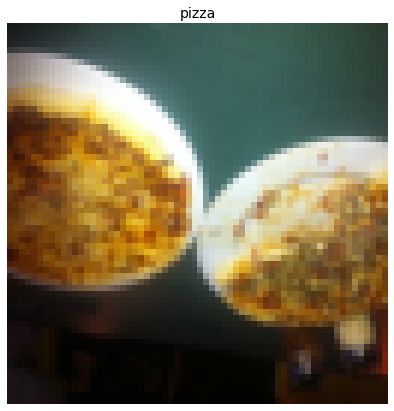

In [60]:
# Rearrange the order dimensions
img_permute = img.permute(1, 2, 0)

# print out different shapes
print(f"Original Shape: {img.shape} -> [color_channel, height, width]")
print(f"Image Permute: {img_permute.shape} -> [height, width, color_channel]")

# Plot the Image
plt.figure(figsize = (10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize = 14)

## 4.3 Turn Loaded images into `DataLoader`

A `DataLoader` is going to help us turn our `Datasets` into iterables  and we can customize the `Batch_Size` so that model can see specific number of images at a time.

In [65]:
import os
os.cpu_count()

8

In [66]:
# Turn train and test datasets into DataLoader
from torch.utils.data import DataLoader
BATCH_SIZE = 4

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = os.cpu_count(),
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                              num_workers = os.cpu_count(),
                              shuffle = False)


train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f6bfe94c490>,
 <torch.utils.data.dataloader.DataLoader at 0x7f6bfe94c3d0>)

In [67]:
len(train_dataloader), len(test_dataloader)

(57, 19)

In [70]:
len(train_data) / 4, len(test_data) / 4

(56.25, 18.75)

In [73]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channel, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([4, 3, 64, 64]) -> [batch_size, color_channel, height, width]
Label shape: torch.Size([4])


# 5. Option 2: Loading Image Data with Custom `Dataset`

To create our own Custom Dataset, we want to:
1. Subclass `torch.utils.data.Dataset`.
2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transformation we'd like to apply.
3. Create several attributes:
    - paths - paths of our images.
    - transform - the transform we'd like to use.
    - classes - a list of the target classes.
    - class_to_idx - a dict of the target classes mapped to integer labels.
4. Create a function to `load_images()`, this function will open an image.
5. Overwrite the `__len()__` method to return the length of our dataset.
6. Overwrite the `__getitem()__` method to return a given sample when passed an index.

In [97]:
import os
import pathlib
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

## 5.1 Replicating Built-in ImageFolder Function by writing our own Custom ImageFolder Function.

In [102]:
# Creating a helper function to get class names
def find_classes(directory: str) -> tuple[list[str], dict[str, int]]:
    """Finds the class folder names in a target directory"""
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # 2. Raise an error if class names could not be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")
        
    # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [103]:
# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # 2. Initialize our custom dataset
    def __init__(self, target_dir: str, transform = None):
        # 3. Create class attributes.
        # Get all of the image paths
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
        # Setup transform
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(target_dir)
        
    # 4. Create a function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)
    
    # 5. Overwrite __len__()
    def __len__(self):
        return len(self.paths)
    
    # 6. Overwrite __getitem__() method to return a particular sample
    # replicate:- img, label = train_data[0] as we did in 'ImageFolder' function above.
    def __getitem__(self, index: int) -> tuple[torch.Tensor, int]:   
        "Returns one sample of data; data and label (X, y)."
        img = self.load_image(index)
        class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]
        
        # Transform if necassary
        if self.transform:
            return self.transform(img), class_idx  # return transformed data and label
        else:
            return img, class_idx    # return untransformed data and label
        

In [104]:
# Create a transform

train_transforms = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.RandomVerticalFlip(p = 0.5),
    transforms.ToTensor()
    ])

test_transforms = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.ToTensor()
    ])

In [105]:
# Test our ImageFolderCustom
train_data_custom = ImageFolderCustom(target_dir = train_dir, transform = train_transforms)

test_data_custom = ImageFolderCustom(target_dir = test_dir, transform = test_transforms)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f6c7917acd0>,
 <__main__.ImageFolderCustom at 0x7f6c7917a790>)

In [114]:
# Check for equality between original ImageFolder Dataset and ImageFolderCustomDataset.
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


## 5.2 Turn custom loaded images into `DataLoader`

In [120]:
from torch.utils.data import DataLoader
BATCH_SIZE = 4

train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                     batch_size = BATCH_SIZE,
                                     num_workers = os.cpu_count(),
                                     shuffle = True) 

test_dataloader_custom = DataLoader(dataset = test_data_custom,
                                     batch_size = BATCH_SIZE,
                                     num_workers = os.cpu_count(),
                                     shuffle = False)



train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f6c79147e80>,
 <torch.utils.data.dataloader.DataLoader at 0x7f6c79147610>)

In [121]:
# Get Image and Label from Custom dataloader

img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([4, 3, 64, 64]), torch.Size([4]))

# 6. Build a BaseLine Model

### 6.1 Model_0:- Tiny VGG From Scratch

In [186]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape, out_channels = hidden_units, kernel_size = 3,
                      stride = 1, padding = 1),
            nn.ReLU(),
            
            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3,
                      stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
            )
        
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3,
                      stride = 1, padding = 1),
            nn.ReLU(),
            
            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3,
                      stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
            )
        
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features = hidden_units * 16 * 16,  # multiplying with shape of input images after conv_block_2
                out_features = output_shape)
            )
        
        
    def forward(self, x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        
        return x
        
        ## return self.classifier(self.conv_block_2(self.conv_block_1(x)))  # benifits from operator fusion. 

In [187]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3,   # no of color channels
                  hidden_units = 10,
                  output_shape = len(class_names)).to(device)


model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [188]:
# Passing a single image to test our model

img, label = next(iter(train_dataloader_custom))
img.shape, label.shape

(torch.Size([4, 3, 64, 64]), torch.Size([4]))

In [189]:
model_0(img.to(device))

tensor([[0.0578, 0.0634, 0.0351],
        [0.0639, 0.0645, 0.0417],
        [0.0649, 0.0659, 0.0411],
        [0.0648, 0.0637, 0.0357]], grad_fn=<AddmmBackward0>)

Model is working fine!!!

## 6.2 Use `torchinfo` to get an idea of the shapes going through our model

In [190]:
import torchinfo
from torchinfo import summary

In [191]:
summary(model_0, input_size = [4, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [4, 3]                    --
├─Sequential: 1-1                        [4, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [4, 10, 64, 64]           280
│    └─ReLU: 2-2                         [4, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [4, 10, 64, 64]           910
│    └─ReLU: 2-4                         [4, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [4, 10, 32, 32]           --
├─Sequential: 1-2                        [4, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [4, 10, 32, 32]           910
│    └─ReLU: 2-7                         [4, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [4, 10, 32, 32]           910
│    └─ReLU: 2-9                         [4, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [4, 10, 16, 16]           --
├─Sequentia

# 7. Create Train and Test Loop Functions
- `train_step()`:- takes in a model and dataloader and trains the model on the dataloader.
- `test_step()`:- takes in a model and dataloader and evaluates the model on the dataloader.

In [222]:
# Create train_step() 
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device = device):
    
    model.train()     # Training Mode ON
    
    # Setup train loss and train accuracy values.
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to the target device
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model(X)    # outputs model logits
        
        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss Backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
        # Calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)
        
    # Adjust metric to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    
    return train_loss, train_acc

In [231]:
# Create test_step()

def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device = device):
    
    model.eval()    # Training Mode OFF, Eval Mode ON...
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference mode
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred_logits = model(X)
            
            # 2. Calculate the loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate the accuracy
            test_pred_labels = test_pred_logits.argmax(dim = 1)
            test_acc += (test_pred_labels == y).sum().item() / len(test_pred_labels)
            
        # Adjust metric to get average loss and average accuracy per batch
        test_loss = test_loss / len(dataloader)
        test_acc = test_acc / len(dataloader)
        
        return test_loss, test_acc
            

## 8. Create a `train()` function to combine `train_step()` and `test_step()`

In [232]:
from tqdm.auto import notebook_tqdm

# 1. Create a train function that takes in various model parameters + optimizers + dataloaders + loss_function.

def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": [] 
              }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in notebook_tqdm(range(epochs)):
        train_loss, train_acc = train_step(model = model,
                                           dataloader = train_dataloader,
                                           loss_fn = loss_fn,
                                           optimizer = optimizer,
                                           device = device)
        
        test_loss, test_acc = test_step(model = model,
                                        dataloader = test_dataloader,
                                        loss_fn = loss_fn,
                                        device = device)
        
        # 4. Print out what's happening
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")
    
        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    
    # 6. Return the filled results at the end of the epochs
    return results

# Train and Evaluate model_0

In [239]:
# Set random seeds
torch.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape = 3,  # no of color channels of our images
                  hidden_units = 10,
                  output_shape = len(train_data.classes)).to(device)

# Setup Loss function and Optimizer
loss_fn = nn.CrossEntropyLoss()
Optimizer = torch.optim.Adam(params = model_0.parameters(), lr = 0.001)

# Train model_0
model_0_results = train(model = model_0, 
                        train_dataloader = train_dataloader_custom,
                        test_dataloader = test_dataloader_custom,
                        optimizer = Optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS
                        )

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.1142 | Train acc: 0.3070 | Test Loss: 1.1019 | Test Acc: 0.3289
Epoch: 1 | Train Loss: 1.1007 | Train acc: 0.3333 | Test Loss: 1.1011 | Test Acc: 0.2500
Epoch: 2 | Train Loss: 1.0982 | Train acc: 0.3377 | Test Loss: 1.1003 | Test Acc: 0.3026
Epoch: 3 | Train Loss: 1.0663 | Train acc: 0.5132 | Test Loss: 1.0802 | Test Acc: 0.3158
Epoch: 4 | Train Loss: 1.0094 | Train acc: 0.4912 | Test Loss: 0.9886 | Test Acc: 0.3991
Epoch: 5 | Train Loss: 0.9249 | Train acc: 0.5614 | Test Loss: 0.9953 | Test Acc: 0.4518
Epoch: 6 | Train Loss: 0.9136 | Train acc: 0.5833 | Test Loss: 1.0007 | Test Acc: 0.4649
Epoch: 7 | Train Loss: 0.8555 | Train acc: 0.6272 | Test Loss: 1.0053 | Test Acc: 0.4386
Epoch: 8 | Train Loss: 0.8673 | Train acc: 0.6096 | Test Loss: 1.0407 | Test Acc: 0.4386
Epoch: 9 | Train Loss: 0.8439 | Train acc: 0.6184 | Test Loss: 1.0066 | Test Acc: 0.4123
Epoch: 10 | Train Loss: 0.8284 | Train acc: 0.6096 | Test Loss: 1.0330 | Test Acc: 0.3860
Epoch: 11 | Train Lo

In [240]:
model_0_results

{'train_loss': [1.114215139757123,
  1.1006549973236888,
  1.0981767595859997,
  1.0662699122177928,
  1.009387125048721,
  0.9249273768642492,
  0.9135653224953434,
  0.855530402639456,
  0.8673451396456936,
  0.843888192846064,
  0.8283600655564091,
  0.8067516569505658,
  0.8067547512943285,
  0.8032000958919525,
  0.8270213860168791,
  0.7702939439761011,
  0.768562409438585,
  0.784930944442749,
  0.7621748065739348,
  0.7589385161797205,
  0.744126645880833,
  0.7026202315301225,
  0.747651293612363,
  0.6790919264026901,
  0.7148631832055878,
  0.6724400760834677,
  0.6855974324831837,
  0.6640086323022842,
  0.653247001531877,
  0.6586457216425946,
  0.6393319008332726,
  0.6348764849336523,
  0.6079965369743213,
  0.5602784335874674,
  0.5886762193159053,
  0.6250677581941873,
  0.6305546431164992,
  0.5773730204081196,
  0.5381628578169304,
  0.5486823915781682,
  0.4773510427851426,
  0.4817190466350631,
  0.48132103688099925,
  0.45698721255911023,
  0.42887691521134813,
  

### Plot the loss curves for model_0

In [241]:
def plot_loss_curves(results: dict[str, list[float]]):
    # Get the loss values of the results dictionary(training and test)
    loss = results["train_loss"]
    test_loss = results["test_loss"]
    
    # Get the accuracy values of the results dictionary (training and test)
    train_accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]
    
    # Figure out how many epochs there were
    epochs = range(len(results["train_loss"]))
    
    # Setup a plot
    plt.figure(figsize = (15, 7))
    
    # Plot the loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = "train_loss")
    plt.plot(epochs, test_loss, label = "test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    # PLot the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label = "train_accuracy")
    plt.plot(epochs, test_accuracy, label = "test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

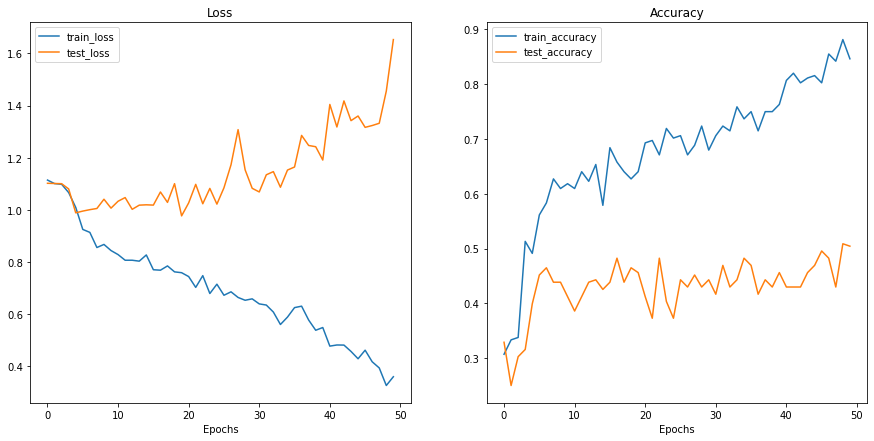

In [242]:
plot_loss_curves(model_0_results)

### We got Overfitting Problem as train loss is low but test loss is high. There are many ways we can deal with OverFitting, one of them is Data Augmentation. In `Model_0`, we did very less data augmentation, now lets create one more model `model_1` with more Data Augmentation.

# 10.1.  Model 1: TinyVGG with more Data Augmentation

In [244]:
from torchvision import transforms

train_transform_trival = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
    ])


test_transforms_simple = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.ToTensor()
    ])


## 10.2 Create train and test `Datasets` and `DataLoader` with data augmentation.

In [245]:
# Turn image folders into Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root = train_dir,
                                            transform = train_transform_trival)

test_data_simple = datasets.ImageFolder(root = test_dir, transform = test_transforms_simple)

In [248]:
# Turn our Datasets into DataLoaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 4
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)


train_dataloader_augmented = DataLoader(dataset = train_data_augmented, batch_size = BATCH_SIZE,
                                        shuffle = True, num_workers = NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset = test_data_simple, batch_size = BATCH_SIZE,
                                    shuffle = False, num_workers = NUM_WORKERS)

## 10.3 Construct and train `model_1`

This time we'll be using the same model architecture expect this time we've augmented the training data.

In [249]:
# Create model_1 and send it to the target device.
torch.manual_seed(42)

model_1 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(train_data_augmented.classes)).to(device)


model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [253]:
# Create Loss Function and Optimizer.

NUM_EPOCHS = 50

# Setup Loss Function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(), lr = 0.001)


model_1_results = train(model_1, 
                        train_dataloader = train_dataloader_augmented,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS,
                        device = device)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.8844 | Train acc: 0.5746 | Test Loss: 0.9998 | Test Acc: 0.4474
Epoch: 1 | Train Loss: 0.9630 | Train acc: 0.5614 | Test Loss: 1.0044 | Test Acc: 0.4079
Epoch: 2 | Train Loss: 0.9180 | Train acc: 0.5702 | Test Loss: 1.0017 | Test Acc: 0.4737
Epoch: 3 | Train Loss: 0.9106 | Train acc: 0.6009 | Test Loss: 0.9872 | Test Acc: 0.4561
Epoch: 4 | Train Loss: 0.9205 | Train acc: 0.5439 | Test Loss: 0.9922 | Test Acc: 0.4605
Epoch: 5 | Train Loss: 0.8603 | Train acc: 0.5965 | Test Loss: 1.0004 | Test Acc: 0.4605
Epoch: 6 | Train Loss: 0.8568 | Train acc: 0.6316 | Test Loss: 1.0388 | Test Acc: 0.4781
Epoch: 7 | Train Loss: 0.9472 | Train acc: 0.5395 | Test Loss: 0.9931 | Test Acc: 0.4474
Epoch: 8 | Train Loss: 0.8819 | Train acc: 0.5789 | Test Loss: 0.9837 | Test Acc: 0.4605
Epoch: 9 | Train Loss: 0.7763 | Train acc: 0.6754 | Test Loss: 1.0280 | Test Acc: 0.4868
Epoch: 10 | Train Loss: 0.8017 | Train acc: 0.6272 | Test Loss: 1.0408 | Test Acc: 0.4737
Epoch: 11 | Train Lo

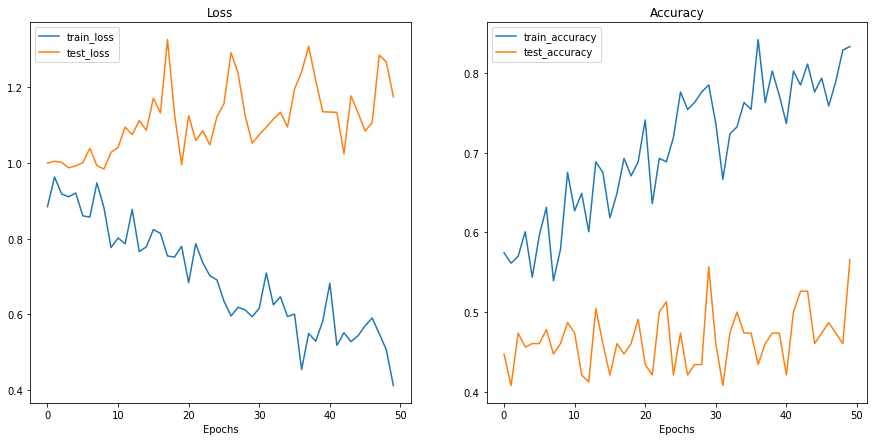

In [254]:
## Plot the Loss curves for model_1
plot_loss_curves(model_1_results)

### Data Augmentation didnt helped overcoming OverFitting problem in this particular case.

# 11. Compare model results

After evaluating our modelling experiments in their own, it's important to compare them to each other.

There are few ways to do this:-

1. Hard Coding (What we are doing).
2. Pytoch + Tensorboard.
3. Weights and Baises.
4. MLFlow.

In [255]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0     1.114215   0.307018   1.101878  0.328947
1     1.100655   0.333333   1.101093  0.250000
2     1.098177   0.337719   1.100334  0.302632
3     1.066270   0.513158   1.080187  0.315789
4     1.009387   0.491228   0.988564  0.399123
5     0.924927   0.561404   0.995251  0.451754
6     0.913565   0.583333   1.000718  0.464912
7     0.855530   0.627193   1.005264  0.438596
8     0.867345   0.609649   1.040720  0.438596
9     0.843888   0.618421   1.006565  0.412281
10    0.828360   0.609649   1.033013  0.385965
11    0.806752   0.640351   1.047107  0.412281
12    0.806755   0.622807   1.002029  0.438596
13    0.803200   0.653509   1.018015  0.442982
14    0.827021   0.578947   1.019332  0.425439
15    0.770294   0.684211   1.018231  0.438596
16    0.768562   0.657895   1.068540  0.482456
17    0.784931   0.640351   1.028573  0.438596
18    0.762175   0.627193   1.100391  0.464912
19    0.758939   0.640351   0.976909  0.456140
20    0.744127   0.692982   1.026673  0.412281
21    0.702620   0.697368   1.097816  0.372807
22    0.747651   0.671053   1.023332  0.482456
23    0.679092   0.719298   1.082239  0.403509
24    0.714863   0.701754   1.021950  0.372807
25    0.672440   0.706140   1.084544  0.442982
26    0.685597   0.671053   1.172855  0.429825
27    0.664009   0.688596   1.307620  0.451754
28    0.653247   0.723684   1.153403  0.429825
29    0.658646   0.679825   1.082653  0.442982
30    0.639332   0.706140   1.068652  0.416667
31    0.634876   0.723684   1.134434  0.469298
32    0.607997   0.714912   1.146613  0.429825
33    0.560278   0.758772   1.086709  0.442982
34    0.588676   0.736842   1.152587  0.482456
35    0.625068   0.750000   1.164328  0.469298
36    0.630555   0.714912   1.285499  0.416667
37    0.577373   0.750000   1.246956  0.442982
38    0.538163   0.750000   1.242066  0.429825
39    0.548682   0.763158   1.191017  0.456140
40    0.477351   0.807018   1.404235  0.429825
41    0.481719   0.820175   1.317815  0.429825
42    0.481321   0.802632   1.417821  0.429825
43    0.456987   0.811404   1.342144  0.456140
44    0.428877   0.815789   1.359957  0.469298
45    0.461756   0.802632   1.316437  0.495614
46    0.417342   0.855263   1.323393  0.482456
47    0.393654   0.842105   1.332049  0.429825
48    0.326308   0.881579   1.455591  0.508772
49    0.359981   0.846491   1.653056  0.504386

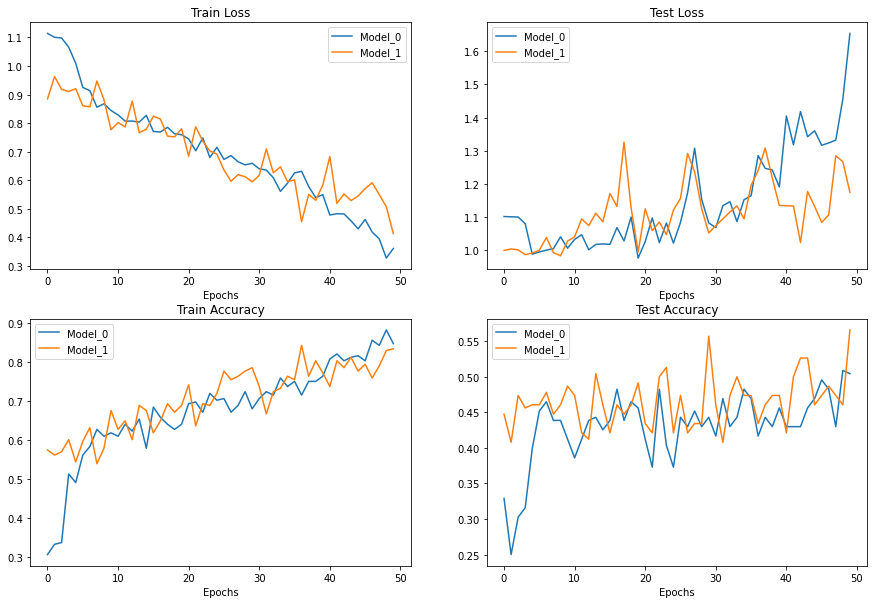

In [264]:
# Setup a Plot
plt.figure(figsize = (15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label = "Model_0")
plt.plot(epochs, model_1_df["train_loss"], label = "Model_1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()


# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label = "Model_0")
plt.plot(epochs, model_1_df["test_loss"], label = "Model_1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()



# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label = "Model_0")
plt.plot(epochs, model_1_df["train_acc"], label = "Model_1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()


# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label = "Model_0")
plt.plot(epochs, model_1_df["test_acc"], label = "Model_1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.show()

# Predicting on Custom Image Sample

We have to make sure our custom image is in same format as the data our model was trained on.

- In tensor form with datatype(torch.float32).
- Of Shape 64x64x3.
- On the right device.

In [327]:
import torchvision

custom_image = torchvision.io.read_image('Datasets/pizza.jpg')
print(custom_image, "\n")
print(f"Custom Image Shape: {custom_image.shape}")
print(f"Custom Image datatype: {custom_image.dtype}")

tensor([[[ 75,  77,  78,  ...,  27,  27,  29],
         [ 69,  68,  74,  ...,  37,  35,  37],
         [ 72,  83, 110,  ...,  39,  38,  39],
         ...,
         [ 13,  13,  15,  ...,  21,  28,  25],
         [ 25,  24,  25,  ...,   8,  14,  25],
         [ 12,  13,  17,  ...,  12,  14,  19]],

        [[ 75,  77,  77,  ...,  27,  28,  30],
         [ 69,  68,  73,  ...,  37,  36,  38],
         [ 71,  82, 109,  ...,  41,  39,  40],
         ...,
         [  9,   9,  11,  ...,  19,  26,  23],
         [ 21,  20,  21,  ...,   6,  12,  23],
         [  8,   9,  13,  ...,   7,   9,  14]],

        [[ 87,  89,  91,  ...,  27,  32,  34],
         [ 81,  80,  87,  ...,  37,  38,  42],
         [ 85,  96, 125,  ...,  40,  41,  42],
         ...,
         [  6,   6,   8,  ...,  24,  31,  28],
         [ 18,  17,  18,  ...,  11,  17,  28],
         [  5,   6,  10,  ...,  13,  15,  20]]], dtype=torch.uint8) 

Custom Image Shape: torch.Size([3, 1333, 2000])
Custom Image datatype: torch.uint8


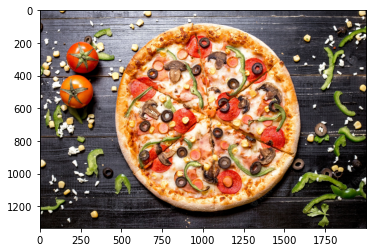

In [328]:
plt.imshow(custom_image.permute(1, 2, 0))
plt.show()

In [329]:
# Datatype of custom image is in torch.uint8, we need to convert it to torch.float32
custom_image = custom_image.type(torch.float32)
print(custom_image.dtype)

torch.float32


In [330]:
# Divide it by 255 to normalize image
custom_image = custom_image / 255

In [350]:
# Create a transform pipeline to resize image
custom_image_transform = transforms.Compose([transforms.Resize(size = (64, 64))])
custom_image = custom_image_transform(custom_image)
print(f"Custom Image Shape : {custom_image.shape}")

Custom Image Shape : torch.Size([1, 3, 64, 64])


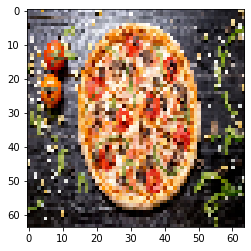

In [332]:
plt.imshow(custom_image.permute(1, 2, 0))
plt.show()

In [333]:
# Now we need to expand dimension means we need to add batch dimension
custom_image = custom_image.unsqueeze(0)
print(f"Custom Image Shape : {custom_image.shape}")

Custom Image Shape : torch.Size([1, 3, 64, 64])


In [335]:
# Try to make a prediction on an image in unit8 format.
model_1.eval()
with torch.inference_mode():
    custom_pred = model_1(custom_image.to(device))

In [338]:
custom_pred

tensor([[-0.2686, -4.3301, -1.0712]])

In [341]:
# Convert logits -> Prediction Probabilities
custom_image_pred_probs = torch.softmax(custom_pred, dim = 1)
custom_image_pred_probs

tensor([[0.6824, 0.0118, 0.3058]])

In [345]:
# Convert Prediction Probabilities -> Prediction Labels
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim = 1).cpu()  
custom_image_pred_labels

tensor([0])

In [346]:
class_names[custom_image_pred_labels]

'pizza'

## Building a Function for predicting on custom image sample

In [361]:
def pred_and_plot_image(model,
                        image_path: str,
                        class_names: list[str],
                        transform = None,
                        device = device):
    
    """
    Makes a prediction on a target image with a trained model and plots the image and prediction.
    """
    
    # 1. Load in the image and change the datatype to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255
    
    # 3. Transform if necessary (example:- Resize the image)
    if transform:
        target_image = transform(target_image)
    
    # 4. Make sure the model is on the target device
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image that is batch dimension
        target_image = target_image.unsqueeze(0)
        
        # Make a prediction on the image with an extra dimension
        target_image_pred = model(target_image.to(device))  # make sure the target image is on right device
        
    # Convert logits -> Prediction probabilities
    target_image_pred_probs = torch.softmax(target_image_pred, dim = 1)
    
    # Convert prediction probabilities -> Prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim = 1)
    
    plt.imshow(target_image.squeeze().permute(1, 2, 0))  # remove batch dim and rearrange the shape.y
    
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    
    plt.title(title)
    plt.axis(False)
    plt.show()

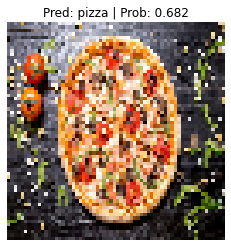

In [362]:
pred_and_plot_image(model = model_1,
                    image_path = custom_image_path,
                    class_names = class_names,
                    transform = custom_image_transform,
                    device = device)